# Experiment 01: Empirical Analysis of Time Complexity

## 1. Objective
To demonstrate the practical difference between **Linear Time** $O(n)$ and **Constant Time** $O(1)$ operations.

## 2. Theoretical Background
In Computer Science, **Big O Notation** describes how the runtime of an algorithm grows as the input size ($n$) grows.

* **$O(n)$ (Linear):** If you double the data, the time doubles. Example: Searching for a value in a standard Python `list`.
* **$O(1)$ (Constant):** The time remains the same, regardless of data size. Example: Looking up a key in a Python `dictionary` or `set` (Hash Map).


![bigOchart.png](./bigOchart.png)

## 3. Hypothesis
We hypothesize that retrieving an item from a `list` will degrade linearly as $n$ increases, while retrieving from a `set` will remain instantaneous.

In [3]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make graphs look scientific
sns.set_theme(style="whitegrid")
%matplotlib inline

In [4]:
def run_complexity_experiment():
    # Define input sizes (n)
    # We go up to 5 million to make the difference obvious
    input_sizes = [10_000, 50_000, 100_000, 500_000, 1_000_000, 2_000_000, 5_000_000]
    
    list_times = []
    set_times = []
    
    print(f"{'n (Input Size)':<20} | {'List Time (s)':<15} | {'Set Time (s)':<15}")
    print("-" * 60)

    for n in input_sizes:
        # 1. Create Data
        # We start with a list of numbers from 0 to n-1
        data_list = list(range(n))
        
        # We convert that list into a Set (Hash Map structure)
        data_set = set(data_list)
        
        # WORST CASE SCENARIO: 
        # We search for a number that doesn't exist (or is at the very end).
        # This forces the List to scan every single item.
        target = -1 
        
        # 2. Time the List Search
        start = time.time()
        _ = target in data_list
        end = time.time()
        list_times.append(end - start)
        
        # 3. Time the Set Search
        start = time.time()
        _ = target in data_set
        end = time.time()
        set_times.append(end - start)
        
        print(f"{n:<20} | {list_times[-1]:.6f}          | {set_times[-1]:.6f}")
        
    return input_sizes, list_times, set_times

# Execute the experiment
sizes, list_times, set_times = run_complexity_experiment()

n (Input Size)       | List Time (s)   | Set Time (s)   
------------------------------------------------------------
10000                | 0.000000          | 0.000000
50000                | 0.000999          | 0.000000
100000               | 0.001000          | 0.000000
500000               | 0.002996          | 0.000000
1000000              | 0.004000          | 0.000000
2000000              | 0.011999          | 0.000000
5000000              | 0.023000          | 0.000000


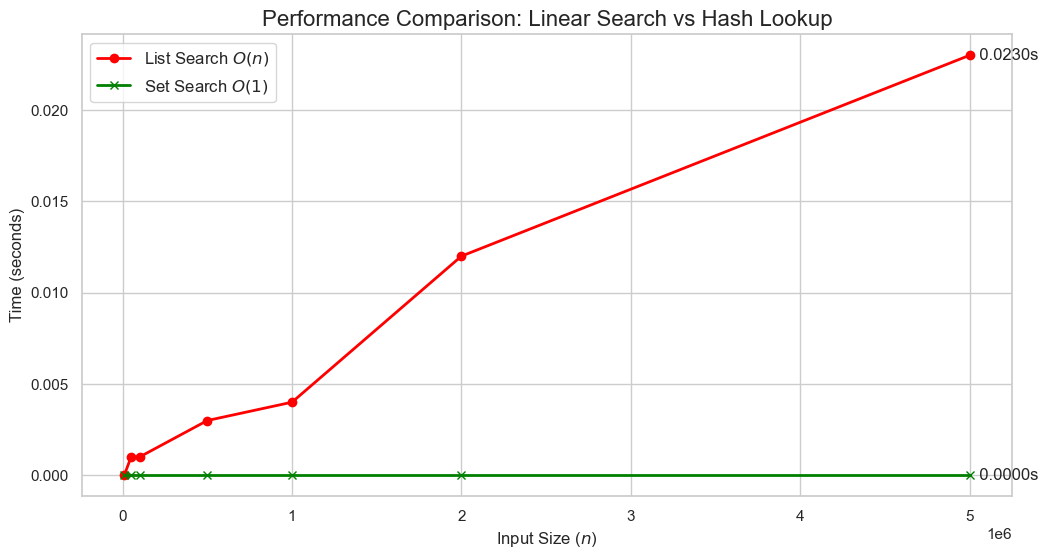

In [5]:
plt.figure(figsize=(12, 6))

# Plot List Data (Red)
plt.plot(sizes, list_times, marker='o', color='red', linewidth=2, label='List Search $O(n)$')

# Plot Set Data (Green)
plt.plot(sizes, set_times, marker='x', color='green', linewidth=2, label='Set Search $O(1)$')

plt.title('Performance Comparison: Linear Search vs Hash Lookup', fontsize=16)
plt.xlabel('Input Size ($n$)', fontsize=12)
plt.ylabel('Time (seconds)', fontsize=12)
plt.legend(fontsize=12)

# Adding a text annotation to explain the graph
plt.text(sizes[-1], list_times[-1], f"  {list_times[-1]:.4f}s", va='center')
plt.text(sizes[-1], set_times[-1], f"  {set_times[-1]:.4f}s", va='center')

plt.show()

## 4. Discussion & Implications for Geospatial Research

The results confirm the hypothesis:
1.  **Linear Growth:** The list search time increases perfectly in a straight line.
2.  **Constant Time:** The set search is a flat line near zero.

### Why this matters:
In GIS, we often ask: *"Is this coordinate point inside our region of interest?"*

If I store 10 million satellite pixel coordinates in a Python `list`, checking for overlap will take **seconds per check**. If I have to check 10 million pixels, the total time will be:
$$10,000,000 \times 1s = \text{Unacceptably Slow}$$

By using **Hash Maps (Sets)** or **Spatial Indices (Quadtrees)**, I can reduce this lookup time to near-instantaneous, making real-time analysis possible.